## 會用到的套件

In [6]:
import pandas as pd
import numpy as np
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from datetime import datetime
import matplotlib.pyplot as plt


import fredapi
from fredapi import Fred



## 自動更新為當前日期

In [7]:

from datetime import datetime

#start_date = '2000-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

#nikkei_225_data = yf.download(nikkei_225_ticker, start='2000-01-01', end=end_date)

## 收集指標資料（V）

｜美联储升降息資料（v）- 不用再執行

In [ ]:
import pandas as pd
import fredapi

from fredapi import Fred

# 使用你的FRED API密鑰
fred = Fred(api_key='87020a0e5ed5a4fa6d5427fa3868d3f3')

# 獲取聯邦基金利率數據
data = fred.get_series('FEDFUNDS')

# 將數據轉換為DataFrame
data = pd.DataFrame(data, columns=['FederalFundsRate'])

# 顯示數據
print(data.head())

# 只截取從2000-01-01到今日的數據
data = data.loc[start_date:end_date]

# 保存數據到CSV文件
data.to_csv('us_interest_rate.csv', index=True, header=True)


            FederalFundsRate
1954-07-01              0.80
1954-08-01              1.22
1954-09-01              1.07
1954-10-01              0.85
1954-11-01              0.83


NameError: name 'start_date' is not defined

## 計算各指標權重（重要性）

### | 個別數據處理

#### 找出最早的共同日期 (code沒問題，沒用到）

In [ ]:
import pandas as pd

# 讀取三個 CSV 文件並解析日期列
df1 = pd.read_csv('japan10y_BondYield.csv', parse_dates=['date'])
df2 = pd.read_csv('japanCPI.csv', parse_dates=['date'])
df3 = pd.read_csv('Nikkei225.csv', parse_dates=['date'])
df4 = pd.read_csv('USDindex.csv', parse_dates=['date'])
df5 = pd.read_csv('japanUSD.csv', parse_dates=['date'])


# 確保所有日期列都是 datetime 類型
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])
df3['date'] = pd.to_datetime(df3['date'])
df4['date'] = pd.to_datetime(df4['date'])
df5['date'] = pd.to_datetime(df5['date'])

# 找出每個 DataFrame 中的所有日期
dates1 = set(df1['date'])
dates2 = set(df2['date'])
dates3 = set(df3['date'])
dates4 = set(df4['date'])
dates5 = set(df5['date'])

# 找出三個 DataFrame 中共同的日期
common_dates = dates1 & dates2 & dates3 & dates4 & dates5

# 找出最早的共同日期
earliest_common_date = min(common_dates)

print(f"最早的共同日期是: {earliest_common_date}")


最早的共同日期是: 2000-08-01 00:00:00


/var/folders/y_/wkvrvqmj58d1bkys2l5zwzpc0000gn/T/ipykernel_36000/1314154034.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1 = pd.read_csv('japan10y_BondYield.csv', parse_dates=['date'])
/var/folders/y_/wkvrvqmj58d1bkys2l5zwzpc0000gn/T/ipykernel_36000/1314154034.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2 = pd.read_csv('japanCPI.csv', parse_dates=['date'])


#### 得知column 名稱(V) - 全部csv 欄位名稱相同了（不用再執行）

In [ ]:

import pandas as pd
from datetime import datetime
'''
japan_trade_balance
'''
# 讀取 CSV 文件，並解析 Date 列為日期時間類型
japan_trade_balance = pd.read_csv('japan_trade_balance.csv', parse_dates=[])

# 打印原始數據的列名
print("原始列名：", japan_trade_balance.columns)
#原始列名： Index(['Unnamed: 0', 'Trade Balance'], dtype='object')
# 更改列名
japan_trade_balance = japan_trade_balance.rename(columns={'Unnamed: 0': 'date', 'Trade Balance': 'number'})

# 保存修改後的文件
japan_trade_balance.to_csv('japan_trade_balance_renamed.csv', index=False)


'''
us_interest_rate
'''
us_interest_rate = pd.read_csv('us_interest_rate.csv', parse_dates=[])
print("原始列名：", us_interest_rate.columns)
#原始列名： Index(['Unnamed: 0', 'FederalFundsRate'], dtype='object')
# 更改列名
us_interest_rate = us_interest_rate.rename(columns={'Unnamed: 0': 'date', 'FederalFundsRate': 'number'})

# 保存修改後的文件
us_interest_rate.to_csv('us_interest_rate_renamed.csv', index=False)




原始列名： Index(['Unnamed: 0', 'Trade Balance'], dtype='object')
原始列名： Index(['Unnamed: 0', 'FederalFundsRate'], dtype='object')


#### 資料日期範圍

In [ ]:
start_date = '2005-01-01'
q1_2024_date = '2024-03-31'

#### 整理 us_interest_rate_renamed(V)

In [ ]:
import pandas as pd

# 從文件中讀取數據，並解析日期列
df_usi = pd.read_csv('us_interest_rate_renamed.csv', parse_dates=['date'])

# 生成完整的日期範圍（2005-01-01 到 2024-03-31）
start_date = '2005-01-01'
q1_2024_date = '2024-03-31'
date_range = pd.date_range(start=start_date, end=q1_2024_date, freq='D')  # 按日頻率生成日期範圍

# 創建 DataFrame，並將 2005-01-01 到 2024-03-31 的數據填充到整個日期範圍內
us_interest_rate_refilled = pd.DataFrame(index=date_range)

# 按月填充數據
for month_start in pd.date_range(start=start_date, end=q1_2024_date, freq='MS'):
    # 計算當前月份的結束日期
    month_end = month_start + pd.DateOffset(months=1) - pd.DateOffset(days=1)
    
    # 提取當前月份的數據值
    month_value = df_usi.loc[df_usi['date'] == month_start, 'number'].values
    
    # 填充數據到對應的日期範圍
    us_interest_rate_refilled.loc[month_start:month_end, 'number'] = month_value[0]

# 保存修改後的文件
us_interest_rate_refilled.to_csv('us_interest_rate_refilled.csv', index=True)

# 更改列名
us_interest_rate_refilled = pd.read_csv('us_interest_rate_refilled.csv', parse_dates=[])
us_interest_rate_refilled = us_interest_rate_refilled.rename(columns={'Unnamed: 0': 'date'})
us_interest_rate_refilled.to_csv('us_interest_rate_refilled.csv', index=False)


#### 整理 japanCPI(V)

In [ ]:
import pandas as pd

# 從文件中讀取數據，並解析日期列
df_cpi = pd.read_csv('japanCPI.csv', parse_dates=['date'])
df_cpi = df_cpi.drop(df_cpi.columns[2], axis=1)

# 生成完整的日期範圍（2005-01-01 到 2024-03-31）
date_range = pd.date_range(start=start_date, end=q1_2024_date, freq='D')  # 按日頻率生成日期範圍

# 創建 DataFrame，並將 2005-01-01 到 2024-03-31 的數據填充到整個日期範圍內
japanCPI_refilled = pd.DataFrame(index=date_range)

# 按月填充數據
for month_start in pd.date_range(start=start_date, end=q1_2024_date, freq='MS'):
    # 計算當前月份的結束日期
    month_end = month_start + pd.DateOffset(months=1) - pd.DateOffset(days=1)
    
    # 提取當前月份的數據值
    month_value = df_cpi.loc[df_cpi['date'] == month_start, 'number'].values
    
    # 填充數據到對應的日期範圍
    japanCPI_refilled.loc[month_start:month_end, 'number'] = month_value[0]

# 保存修改後的文件
japanCPI_refilled.to_csv('japanCPI_refilled.csv', index=True)

# 更改列名
japanCPI_refilled = pd.read_csv('japanCPI_refilled.csv', parse_dates=[])
japanCPI_refilled = japanCPI_refilled.rename(columns={'Unnamed: 0': 'date'})
japanCPI_refilled.to_csv('japanCPI_refilled.csv', index=False)


/var/folders/y_/wkvrvqmj58d1bkys2l5zwzpc0000gn/T/ipykernel_38243/1614852696.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cpi = pd.read_csv('japanCPI.csv', parse_dates=['date'])


#### 整理 japan10y_BondYield

In [ ]:
import pandas as pd

# 從文件中讀取數據，並解析日期列
df_japan10y_BondYield = pd.read_csv('japan10y_BondYield.csv', parse_dates=['date'])

# 生成完整的日期範圍（2005-01-01 到 2024-03-31）
date_range = pd.date_range(start=start_date, end=q1_2024_date, freq='D')  # 按日頻率生成日期範圍

# 創建 DataFrame，並將 2005-01-01 到 2024-03-31 的數據填充到整個日期範圍內
japan10y_BondYield_refilled = pd.DataFrame(index=date_range)

# 按月填充數據
for month_start in pd.date_range(start=start_date, end=q1_2024_date, freq='MS'):
    # 計算當前月份的結束日期
    month_end = month_start + pd.DateOffset(months=1) - pd.DateOffset(days=1)
    
    # 提取當前月份的數據值
    month_value = df_japan10y_BondYield.loc[df_japan10y_BondYield['date'] == month_start, 'number'].values
    
    # 填充數據到對應的日期範圍
    japan10y_BondYield_refilled.loc[month_start:month_end, 'number'] = month_value[0]

# 保存修改後的文件
japan10y_BondYield_refilled.to_csv('japan10y_BondYield_refilled.csv', index=True)

# 更改列名
japan10y_BondYield_refilled = pd.read_csv('japan10y_BondYield_refilled.csv', parse_dates=[])
japan10y_BondYield_refilled = japan10y_BondYield_refilled.rename(columns={'Unnamed: 0': 'date'})
japan10y_BondYield_refilled.to_csv('japan10y_BondYield_refilled.csv', index=False)


/var/folders/y_/wkvrvqmj58d1bkys2l5zwzpc0000gn/T/ipykernel_38243/3480719795.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_japan10y_BondYield = pd.read_csv('japan10y_BondYield.csv', parse_dates=['date'])


### | 共同數據整理 - by 陳

### ｜模型（隨機森林 & LSTM）

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.regularizers import l2
from sklearn.metrics import mean_squared_error



#### 加載數據

In [ ]:
import pandas as pd

# 讀取數據
data = pd.read_csv('data_final.csv', parse_dates=['date'])
data.set_index('date', inplace=True)

# 查看數據
print(data.head())
print(len(data))



            JP_trade_balance  Nikkei225    DXY  USDJPY  JP_10Y_yield  JP_CPI  \
date                                                                           
2005-01-04            1844.0   11437.52  82.57  104.31         1.368    95.3   
2005-01-05            1844.0   11437.52  82.54  103.93         1.368    95.3   
2005-01-06            1844.0   11492.26  83.15  104.89         1.368    95.3   
2005-01-07            1844.0   11433.24  83.61  104.84         1.368    95.3   
2005-01-11            1844.0   11539.99  83.02  103.37         1.368    95.3   

            US_interest_rate    BLK    BEN   FSI    AB  BRK-B  HTHIY  NTDOY  
date                                                                         
2005-01-04              2.28  47.73  12.80  3.35  9.53  57.10  64.58   3.03  
2005-01-05              2.28  47.29  12.62  3.21  9.50  57.20  65.32   3.08  
2005-01-06              2.28  50.54  12.67  3.42  9.49  57.48  64.57   2.95  
2005-01-07              2.28  49.49  12.54  3.53 

#### 使用隨機森林評估特徵重要性

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 定義特征和目標
features = ['JP_trade_balance', 'Nikkei225', 'DXY', 'JP_10Y_yield', 'JP_CPI', 'US_interest_rate', 'BLK', 'BEN', 'FSI', 'AB', 'BRK-B', 'HTHIY', 'NTDOY']
target = 'USDJPY'

X = data[features]
y = data[target]

# 拆分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練隨機森林模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 獲取特征重要性
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'feature': features, 'importance': importances}).sort_values(by='importance', ascending=False)

print(feature_importance)


             feature  importance
1          Nikkei225    0.582340
4             JP_CPI    0.174837
9                 AB    0.083110
3       JP_10Y_yield    0.075972
5   US_interest_rate    0.027316
2                DXY    0.020410
7                BEN    0.010617
11             HTHIY    0.006477
6                BLK    0.006055
10             BRK-B    0.003793
8                FSI    0.003381
0   JP_trade_balance    0.003326
12             NTDOY    0.002366


#### 使用LSTM進行預測

In [ ]:
# 選擇特定的重要特征進行預測
selected_features = feature_importance['feature'].head(6).tolist()

# 歸一化數據
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[selected_features + [target]])

print(scaled_data)

[[0.18558195 0.12149533 0.15005834 ... 0.42802303 0.26276417 0.38320775]
 [0.18558195 0.12149533 0.14935823 ... 0.42802303 0.26206284 0.37809473]
 [0.18789996 0.12149533 0.14912485 ... 0.42802303 0.27632317 0.39101184]
 ...
 [0.86653254 0.97196262 0.67047841 ... 0.88291747 0.7270432  0.74071582]
 [0.88201119 0.97196262 0.67607935 ... 0.88291747 0.7319525  0.76749193]
 [0.87774062 0.97196262 0.68144691 ... 0.88291747 0.72035721 0.76547363]]


In [ ]:
# 創建數據集
def create_dataset(data, time_step=1): #time_step 默認為 1
    X, Y = [], []
    for i in range(len(data)-time_step-1):  
        X.append(data[i:(i+time_step), :-1])    #, :-1 means 刪除選到的裡面的矩陣的最後一個值。就是說他是一個2維數據[[1,2],[3,4],[5,6]] -->[[1],[3]]
        Y.append(data[i + time_step, -1])   #這個-1沒有冒號，表示要選取最後一列
    return np.array(X), np.array(Y)

In [ ]:
# 定義時間步長
time_step = 10

# 準備訓練集和測試集
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# 重塑輸入數據為LSTM模型的格式 [samples, time_steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], len(selected_features))
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], len(selected_features))

# 創建LSTM模型並加入L2正則化
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, len(selected_features)), kernel_regularizer=l2(0.01)))
# 添加 Dropout 層以減少過擬合風險
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences=False, kernel_regularizer=l2(0.01)))
# 添加 Dropout 層以減少過擬合風險
model.add(Dropout(0.2))

model.add(Dense(1, kernel_regularizer=l2(0.01)))
model.compile(optimizer='adam', loss='mean_squared_error')

# 訓練模型
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)
loss, accuracy = model.evaluate(X_train, y_train, batch_size=64)

# 預測
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 調整預測結果和實際值的長度以對應時間步長
train_predict = train_predict[time_step-1:]
test_predict = test_predict[time_step-1:]
y_train_actual = y_train[time_step-1:]
y_test_actual = y_test[time_step-1:]

# 反歸一化預測結果
train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], len(selected_features)))), axis=1))[:, 0]
test_predict = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], len(selected_features)))), axis=1))[:, 0]

# 反歸一化實際值
y_train_actual = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], len(selected_features)))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], len(selected_features)))), axis=1))[:, 0]


Epoch 1/100


/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.8499
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.3250
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1324
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0607
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0335
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0212
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0118
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0097
Epoch 10/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0085
Epoch 11/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0075
Epoch 12/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0068
Epoch 13/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0063
Epoch 14/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0057
Epoch 15/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0056
E

TypeError: cannot unpack non-iterable float object

In [83]:
loss

0.0027689330745488405

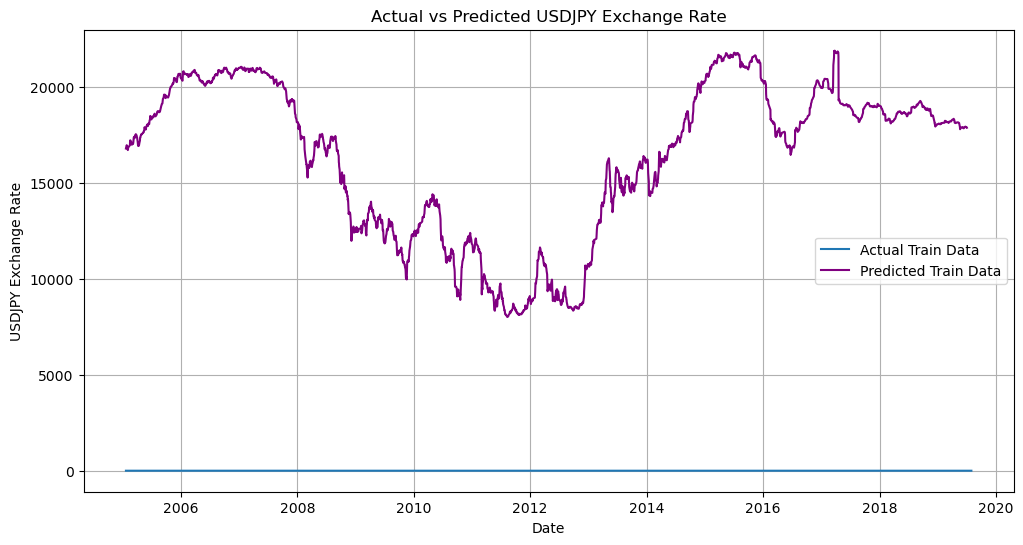

In [89]:
# 繪製訓練集實際數據和預測數據
plt.figure(figsize=(12, 6))
plt.plot(data.index[time_step:time_step + len(y_train)], y_train, label='Actual Train Data')
plt.plot(data.index[time_step:time_step + len(train_predict)], train_predict, label='Predicted Train Data', color='purple')  # 修改顏色為紫色

plt.title('Actual vs Predicted USDJPY Exchange Rate')
plt.xlabel('Date')
plt.ylabel('USDJPY Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()



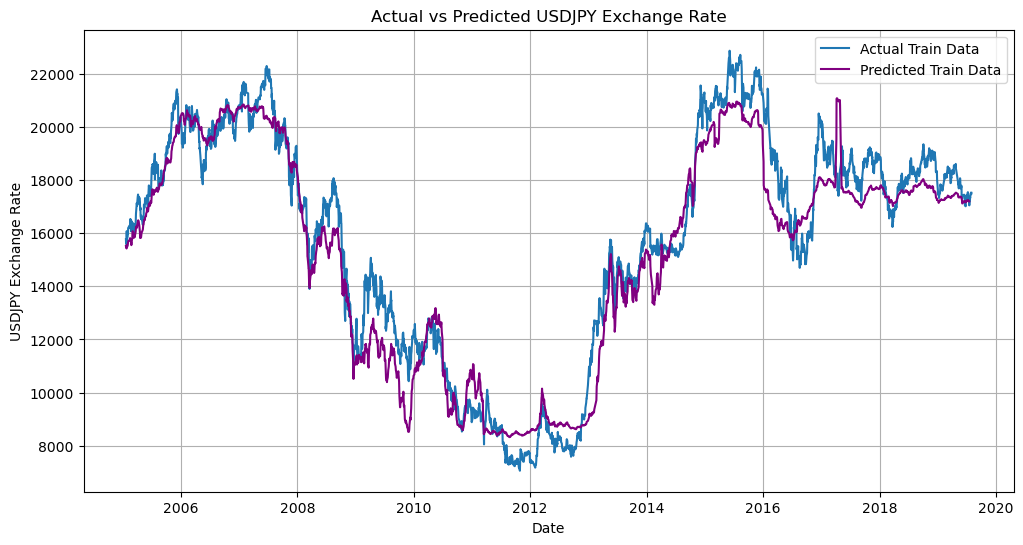

In [73]:
# 繪製訓練集實際數據和預測數據
plt.figure(figsize=(12, 6))
plt.plot(data.index[time_step:time_step + len(y_train_actual)], y_train_actual, label='Actual Train Data')
plt.plot(data.index[time_step:time_step + len(train_predict)], train_predict, label='Predicted Train Data', color='purple')  # 修改顏色為紫色

plt.title('Actual vs Predicted USDJPY Exchange Rate')
plt.xlabel('Date')
plt.ylabel('USDJPY Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()



## 評估模型

### MSE

In [84]:
# 調整預測結果的長度以匹配時間步長
train_predict = train_predict[time_step-1:]
test_predict = test_predict[time_step-1:]

# 修剪實際值的長度，使其與預測值對齊
y_train_actual = y_train_actual[:len(train_predict)]
y_test_actual = y_test_actual[:len(test_predict)]

# 確保預測值和實際值的長度相同，並計算均方誤差
train_mse = mean_squared_error(y_train_actual, train_predict)
test_mse = mean_squared_error(y_test_actual, test_predict)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")

Train Mean Squared Error: 1169813.7705091073
Test Mean Squared Error: 16714063.359253582
